In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
MILISECONDS_IN_HOUR = 3600000



In [4]:
fragments = pd.read_parquet("fragments.parquet")
tasks = pd.read_parquet("tasks.parquet")

In [5]:
fragments = fragments.groupby("id").sum()
fragments

,duration,cpu_count,cpu_usage
id,,,
1019,2592252000,6148,3.344239e+04
1023,2592252000,5106,2.734402e+04
1026,2592252000,7348,1.999994e+05
1052,577855000,839,4.740120e+03
1073,1823566000,4574,2.260175e+04
1129,2592252000,5420,2.885690e+04
1132,1909074000,4604,2.499375e+04
1138,2592252000,7309,1.754719e+05
1147,2592252000,6167,2.965456e+04


In [6]:
# avergage job duration
average_job_duration = fragments['duration'].mean()
print(f"Average job duration in hours: {average_job_duration / MILISECONDS_IN_HOUR}")

Average job duration in hours: 673.9386444444444


In [4]:
tasks

,id,submission_time,duration,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46,2592252000,1,2926.000135,181352
1,1023,2013-08-12 13:35:46,2592252000,1,2925.999560,260096
2,1026,2013-08-12 13:35:46,2592252000,1,2925.999717,249972
3,1052,2013-08-29 14:38:12,577855000,1,2926.000107,131245
4,1073,2013-08-21 11:07:12,1823566000,1,2599.999649,179306
5,1129,2013-08-12 13:35:46,2592252000,1,2925.999494,124928
6,1132,2013-08-20 11:22:04,1909074000,1,2925.999318,191739
7,1138,2013-08-12 13:35:46,2592252000,1,2599.999602,156776
8,1147,2013-08-12 13:35:46,2592252000,1,2599.999649,103484
9,1152,2013-08-12 13:35:46,2592252000,1,2925.999560,195624


In [5]:
# Calculate total CPU hours from tasks
tasks['cpu_hours'] = (tasks['cpu_count'] * tasks['duration']) / MILISECONDS_IN_HOUR
total_cpu_hours = tasks['cpu_hours'].sum()

print(f"Total CPU hours: {total_cpu_hours}")


Total CPU hours: 136127.79722222223


In [10]:
average_task_duration = tasks['duration'].mean()

print(f"Average task duration in hours: {average_task_duration / MILISECONDS_IN_HOUR}")

Average task duration in hours: 673.9386444444444


Average job duration in hours: 673.9386444444444
Min job duration in hours: 160.3486111111111
Max job duration in hours: 720.07


{'whiskers': [<matplotlib.lines.Line2D at 0x169696bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x169697c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1696962d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1696a0c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1696a14d0>],
 'means': []}

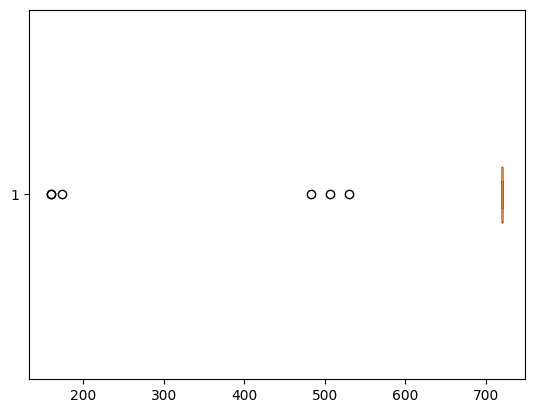

In [14]:
average_job_duration = tasks['duration'].mean()
print(f"Average job duration in hours: {average_job_duration / MILISECONDS_IN_HOUR}")

min_job_duration = tasks['duration'].min()
max_job_duration = tasks['duration'].max()

print(f"Min job duration in hours: {min_job_duration / MILISECONDS_IN_HOUR}")
print(f"Max job duration in hours: {max_job_duration / MILISECONDS_IN_HOUR}")

plt.boxplot(tasks['duration'] / MILISECONDS_IN_HOUR, vert=False)